In [32]:
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt


class WalkState(Enum):
    Zero = 0
    A = 1
    B = 2
    C = 3
    D = 4
    E = 5
    Goal = 6


def get_reward(state: WalkState):
    rewards = {
        WalkState.Goal: 1,
    }
    return rewards.get(state, 0)

def pick_action():
    return np.random.choice(['left', 'right'], p=[0.5, 0.5])

def get_init_values(val:int=0.5):
    values = [0]
    values = values + [val for i in range (len(WalkState)-2)] # 7 States, 2 final: 0 and -1
    values.append(0)
    return values

def plot_state_values(state_values, label, color='k'):
    states = [WalkState(i+1).name for i in range(len(state_values))]
    plt.plot(states, state_values, color=color, linestyle='solid', marker='o', label=f'{label}')

# lambda function for discrete color list from red to green, leght of log_episodes
get_colors = lambda n: plt.cm.viridis(np.linspace(0, 1, n))

class RandomWalk:
    def __init__(self, init_state_=WalkState.C.value) -> None:
        self.init_state = WalkState(init_state_)

        self.state = WalkState(init_state_)
    
    def __repr__(self) -> str:
        return f'RandomWalk(current state: {self.state.name})'
    
    # Actions
    def excecute_action(self, action):
        if action == 'left':
            self.left()
        elif action == 'right':
            self.right()

    
    def left(self):
        if self.state == WalkState.Zero:
            raise Exception('Cannot move left from the zero state')
        self.state = WalkState(self.state.value - 1)

    def right(self):
        if self.state == WalkState.Goal:
            raise Exception('Cannot move right from the goal state')
        self.state = WalkState(self.state.value + 1)


In [94]:
# Iterations of alpha
all_results = [] # list of dicts

In [ ]:
def montecarlo_estimation(trajectory, rewards, values, alpha=0.1, gamma=1.0):
    """
    Estimates the state values using the montecarlo method
    trajectory: list of trajectories in episode
    rewards: list of rewards in episode
    values: list of state values
    alpha: learning rate
    """
    Gt = 0
	for St, Rtp1 in zip(reversed(trajectory[:-1]), reversed(rewards)):
		# calculate return (Gt)
		Gt = gamma*Gt + Rtp1
		state_values[St] += alpha*(Gt - state_values[St]

def temporal_difference_estimation():
    ...

In [99]:
alpha = 0.3 # learning rate
gamma = 1 # discount factor

state_values = get_init_values()
true_values = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 0]
# plot_state_values(state_values=get_init_values()[1:-1], label='init values', color='r')
# plot_state_values(state_values=true_values[1:-1], label='true values', color='g')

N_EPISODES = 101
log_episodes = [100,300,500]
COLORS = get_colors(len(log_episodes))

# Episode data
experiment_results = {
	'alpha': alpha,
	'rmse': []
}

experiment_results['alpha'] = alpha

for episode in range(N_EPISODES):
	sm = RandomWalk()
	episode_rewards = [0]
	trajectory = [sm.state.value]

	# episode starts
	while True:
		action = pick_action()
		sm.excecute_action(action)

		trajectory.append(sm.state.value)
		episode_rewards.append(get_reward(sm.state))

		if sm.state in (WalkState.Goal, WalkState.Zero):
				# end of episode
				break
	# /episode
		
	# Montecarlo estimation
	Gt = 0
	for St, Rtp1 in zip(reversed(trajectory[:-1]), reversed(episode_rewards)):
		# calculate return (Gt)
		Gt = gamma*Gt + Rtp1
		state_values[St] += alpha*(Gt - state_values[St])
	
	if episode in log_episodes:
		# get episode index in log_episodes
		# COLORS[log_episodes.index(episode)]
		plot_state_values(
			state_values=state_values[1:-1],
			label=f'Episode {episode}',
			color=COLORS[log_episodes.index(episode)]
		)

	# log RMSE
	rmse = np.sqrt(np.mean((np.array(true_values) - np.array(state_values))**2))
	experiment_results['rmse'].append(rmse)

# # add experiment data to all results
# plt.xlabel('State')
# plt.ylabel('State Value')
# plt.title(f'State Values | alpha={alpha} | gamma={gamma}')
# plt.legend()
# plt.show()

# all_results.append(experiment_results)

In [100]:
for results in all_results:
    print(results['alpha'])

0.01
0.03
0.05
0.1
0.3


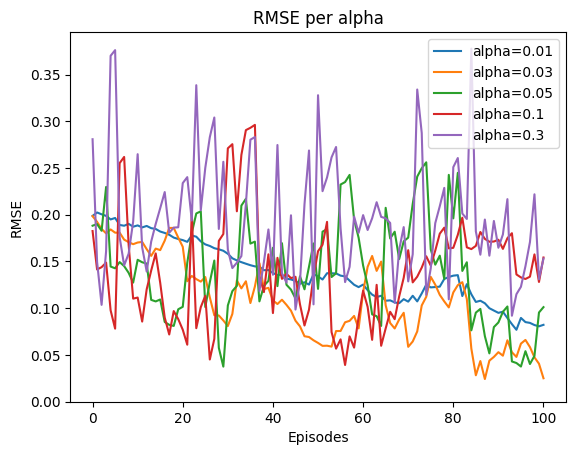

In [101]:
# plot RMSE per alpha
for result in all_results:
    plt.plot(result['rmse'], label=f"alpha={result['alpha']}")
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.ylim(0)
plt.title('RMSE per alpha')
plt.legend()
plt.show()

In [74]:
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [18]:
print(trajectory)
print(episode_rewards)
for St, Rtp1 in zip(reversed(trajectory[:-1]), reversed(episode_rewards)):
    print(St)

[3, 4, 5, 6]
[0, 0, 0, 1]
(5, 1)
(4, 0)
(3, 0)
